In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Upload dataset in panda dataframe for EDA
df_features = pd.read_csv("Features data set.csv")
df_sales = pd.read_csv("sales data-set.csv")
df_stores = pd.read_csv("stores data-set.csv")

In [4]:
# Checking the dataset few rows and columns information 
print (df_features.info())
print (df_sales.info())
print (df_stores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store     

In [7]:
#Changing date to datetime 
df_features['Date'] = pd.to_datetime(df_features['Date'], format='%d/%m/%Y')
df_sales['Date'] = pd.to_datetime(df_sales['Date'], format='%d/%m/%Y')

In [9]:
print(df_sales.head())
print(df_sales.info())
df_sales.describe().drop(columns=["Date"]).T

   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB
None


,count,mean,min,25%,50%,75%,max,std
Store,421570.0,22.200546,1.00,11.00,22.00,33.0000,45.00,12.785297
Dept,421570.0,44.260317,1.00,18.00,37.00,74.0000,99.00,30.492054
Weekly_Sales,421570.0,15981.258123,-4988.94,2079.65,7612.03,20205.8525,693099.36,22711.183519


In [11]:
print(df_stores.head())
print(df_stores.info())
df_stores.describe().T

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None


,count,mean,std,min,25%,50%,75%,max
Store,45.0,23.0,13.133926,1.0,12.0,23.0,34.0,45.0
Size,45.0,130287.6,63825.271991,34875.0,70713.0,126512.0,202307.0,219622.0


In [13]:
#Merging the data into a single Dataframe
df_features = df_features.merge(df_stores, on = 'Store')
df = df_features.merge(df_sales, on = ['Store','Date','IsHoliday'])

In [15]:
#Fill missing values with 0 in a single Dataframe
df=df.fillna(0)

In [17]:
print(df.head())
print(df.info())
df.describe().drop(columns=["Date"]).T

   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        0.0        0.0        0.0   
1      1 2010-02-05        42.31       2.572        0.0        0.0        0.0   
2      1 2010-02-05        42.31       2.572        0.0        0.0        0.0   
3      1 2010-02-05        42.31       2.572        0.0        0.0        0.0   
4      1 2010-02-05        42.31       2.572        0.0        0.0        0.0   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday Type    Size  \
0        0.0        0.0  211.096358         8.106      False    A  151315   
1        0.0        0.0  211.096358         8.106      False    A  151315   
2        0.0        0.0  211.096358         8.106      False    A  151315   
3        0.0        0.0  211.096358         8.106      False    A  151315   
4        0.0        0.0  211.096358         8.106      False    A  151315   

   Dept  Weekly_Sales  
0     1      24924.50  
1 

,count,mean,min,25%,50%,75%,max,std
Store,421570.0,22.200546,1.000,11.000000,22.00000,33.000000,45.000000,12.785297
Temperature,421570.0,60.090059,-2.060,46.680000,62.09000,74.280000,100.140000,18.447931
Fuel_Price,421570.0,3.361027,2.472,2.933000,3.45200,3.738000,4.468000,0.458515
MarkDown1,421570.0,2590.074819,0.000,0.000000,0.00000,2809.050000,88646.760000,6052.385934
MarkDown2,421570.0,879.974298,-265.760,0.000000,0.00000,2.200000,104519.540000,5084.538801
MarkDown3,421570.0,468.087665,-29.100,0.000000,0.00000,4.540000,141630.610000,5528.873453
MarkDown4,421570.0,1083.132268,0.000,0.000000,0.00000,425.290000,67474.850000,3894.529945
MarkDown5,421570.0,1662.772385,0.000,0.000000,0.00000,2168.040000,108519.280000,4207.629321
CPI,421570.0,171.201947,126.064,132.022667,182.31878,212.416993,227.232807,39.159276
Unemployment,421570.0,7.960289,3.879,6.891000,7.86600,8.572000,14.313000,1.863296


In [18]:
# Splitting the Date column
df['Year'] = df['Date'].dt.year      # Extract year
df['Month'] = df['Date'].dt.month    # Extract month
df['Day'] = df['Date'].dt.day        # Extract day
df['Year-Month'] = df['Date'].dt.to_period('M').astype(str)  # Extract year-month

In [20]:
# Saving the process dataset to a CSV file
processed_data = "processed_data.csv"
df.to_csv(processed_data, index=False)

processed_data

'processed_data.csv'

In [21]:
# Count duplicate rows
print(df.duplicated().sum())

0


# Exploratory Data Analysis (EDA)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="viridis")

In [24]:
#Rounding the Temprature Range
r = 5 #lets round off the temperature in the range of r
df['Temperature_r'] = df.sort_values(by=['Temperature']).Temperature.apply(lambda x : x - x %r)

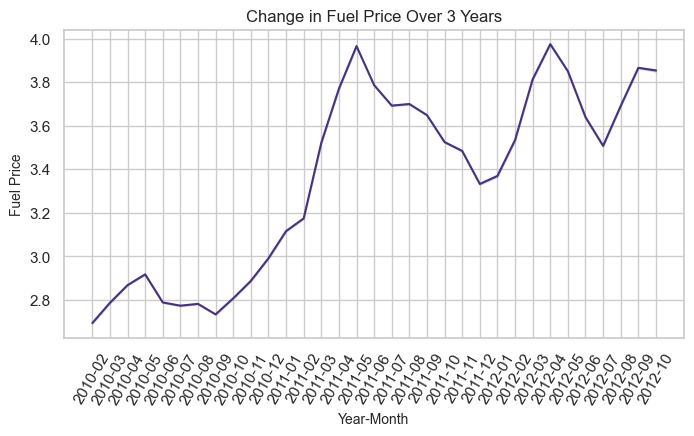

In [26]:
#To manage saving plots with unique filenames
plot_no = 1

# 1. Line Plot: Fuel Price Over 3 Years
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='Year-Month', y='Fuel_Price')
plt.xticks(rotation=60)
plt.title('Change in Fuel Price Over 3 Years', fontsize=12)
plt.xlabel('Year-Month', fontsize=10)
plt.ylabel('Fuel Price', fontsize=10)
plt.savefig(f'{plot_no}_plot.png')
plot_no += 1

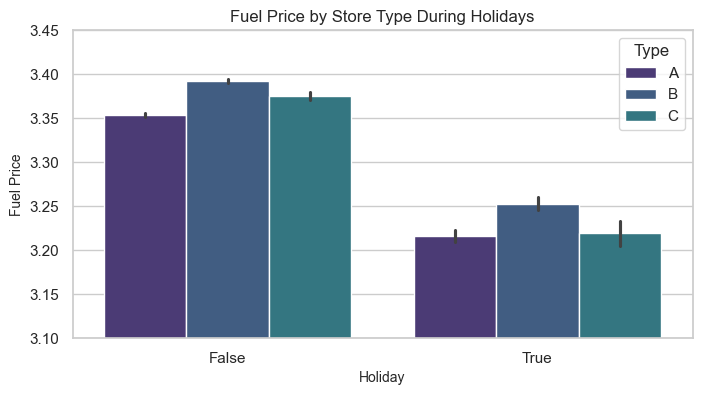

In [27]:
# 2. Bar Plot: Fuel Price by Store Type During Holidays
plt.figure(figsize=(8, 4))
plt.ylim(3.1,3.45)
sns.barplot(data=df, x='IsHoliday', y='Fuel_Price', hue='Type')
plt.title('Fuel Price by Store Type During Holidays', fontsize=12)
plt.xlabel('Holiday', fontsize=10)
plt.ylabel('Fuel Price', fontsize=10)
plt.savefig(f'{plot_no}_plot.png')
plot_no += 1

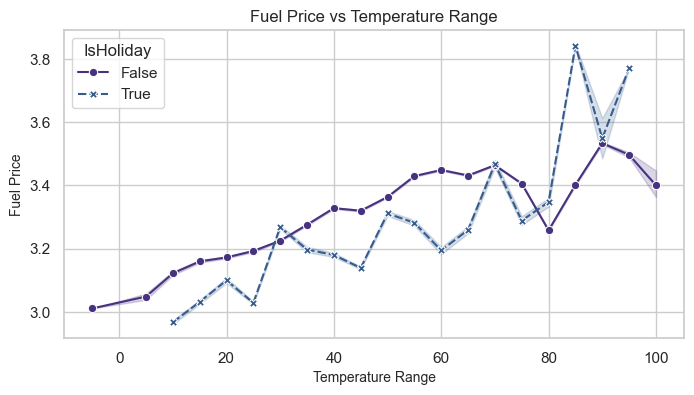

In [28]:
# 3. Line Plot: Fuel Price vs Temperature Range
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='Temperature_r', y='Fuel_Price', hue='IsHoliday', style='IsHoliday', markers=True, errorbar=('ci', 68))
plt.title('Fuel Price vs Temperature Range', fontsize=12)
plt.xlabel('Temperature Range', fontsize=10)
plt.ylabel('Fuel Price', fontsize=10)
plt.savefig(f'{plot_no}_plot.png')
plot_no += 1

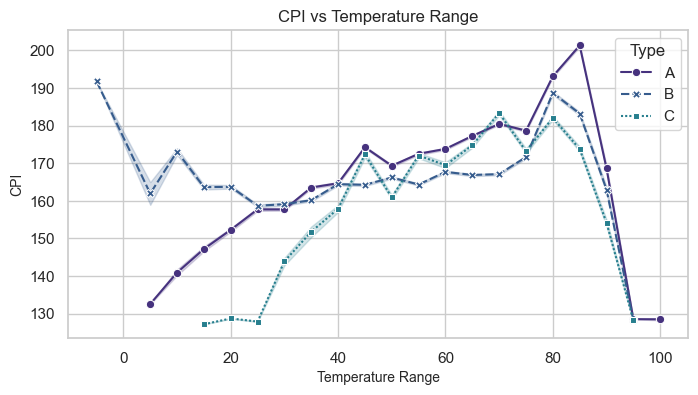

In [29]:
# 4. Line Plot: CPI vs Temperature Range
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='Temperature_r', y='CPI', hue='Type', style='Type', markers=True, errorbar=('ci', 68))
plt.title('CPI vs Temperature Range', fontsize=12)
plt.xlabel('Temperature Range', fontsize=10)
plt.ylabel('CPI', fontsize=10)
plt.savefig(f'{plot_no}_plot.png')
plot_no += 1

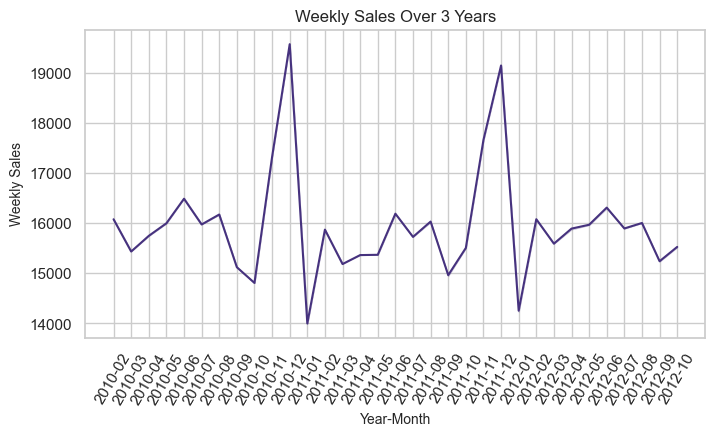

In [30]:
# 5. Line Plot: Weekly Sales Over 3 Years
ax = plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='Year-Month', y='Weekly_Sales', errorbar=('ci', 1))
plt.xticks(rotation=60)
plt.title('Weekly Sales Over 3 Years', fontsize=12)
plt.xlabel('Year-Month', fontsize=10)
plt.ylabel('Weekly Sales', fontsize=10)
plt.savefig(f'{plot_no}_plot.png')
plot_no += 1

<Figure size 1200x800 with 0 Axes>

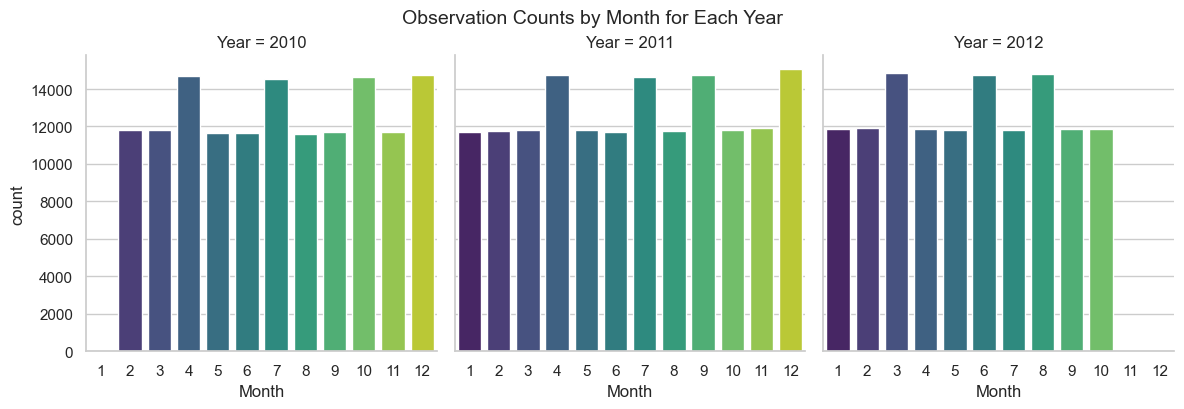

In [31]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
# 6. Count Plot: Observation Counts by Month and Year    
    plt.figure(figsize=(12, 8))
    sns.catplot(data=df, x='Month', kind='count', col='Year', col_wrap=3, height=4, aspect=1, palette='viridis')
    plt.suptitle('Observation Counts by Month for Each Year', fontsize=14, y=1.02)
    plt.savefig(f'{plot_no}_plot.png')
    plot_no += 1

Type
A    3.343999
B    3.382523
C    3.364654
Name: Fuel_Price, dtype: float64


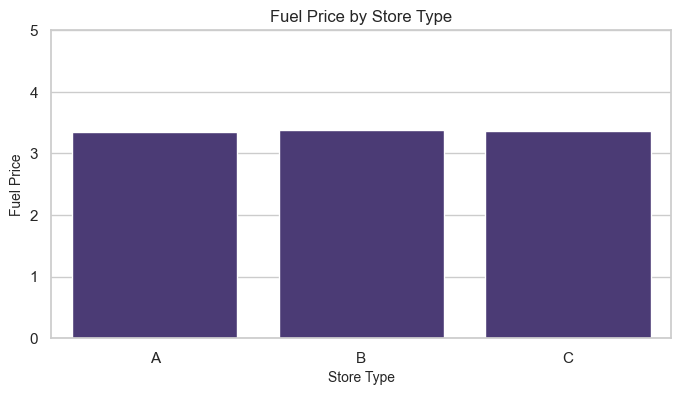

In [32]:
# 7. Bar Plot: Fuel Price by Store Type
Price_by_store = df.groupby('Type')['Fuel_Price'].mean()
print(Price_by_store)
plt.figure(figsize=(8, 4))
plt.ylim(0.0,5.0)
sns.barplot(data=df, x='Type', y='Fuel_Price')
plt.title('Fuel Price by Store Type', fontsize=12)
plt.xlabel('Store Type', fontsize=10)
plt.ylabel('Fuel Price', fontsize=10)
plt.savefig(f'{plot_no}_plot.png')
plot_no += 1

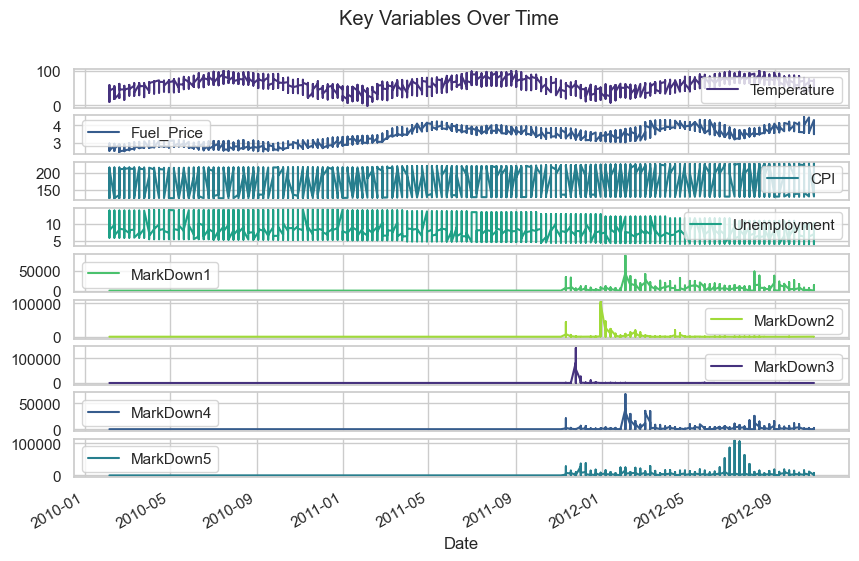

In [34]:
# 8. Multi-Line Subplots for Key Variables
df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(
    x='Date', subplots=True, figsize=(10, 6), title='Key Variables Over Time')
plt.savefig(f'{plot_no}_plot.png')
plot_no += 1

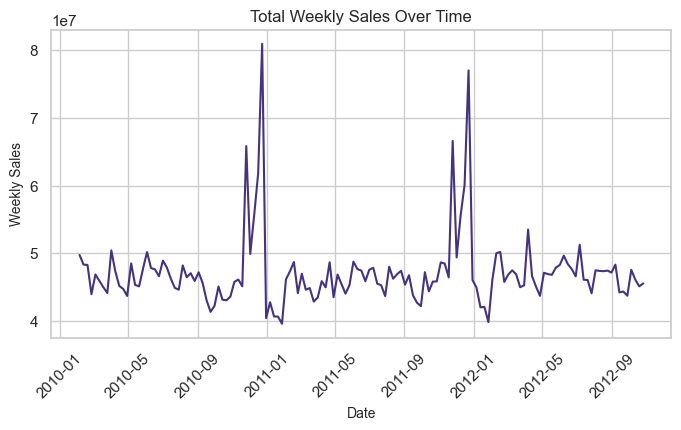

In [37]:
# 9. Line Plot: Weekly Sales Spread
df_average_sales_week = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
plt.figure(figsize=(8, 4))
plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales)
plt.title('Total Weekly Sales Over Time', fontsize=12)
plt.xlabel('Date', fontsize=10)
plt.xticks(rotation=45)
plt.ylabel('Weekly Sales', fontsize=10)
plt.savefig(f'{plot_no}_plot.png')
plot_no += 1

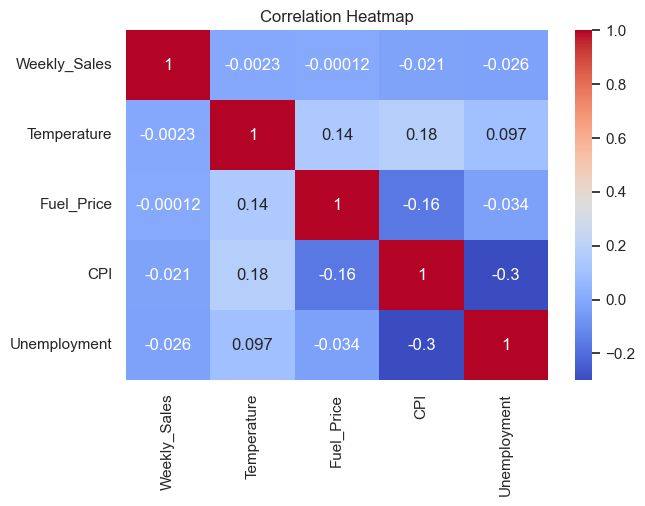

In [39]:
# 10. Correlation Heatmap
plt.figure(figsize=(15, 10))    
plt.subplot(2, 2, 3)
correlation_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
sns.heatmap(df[correlation_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig(f'{plot_no}_plot.png')
plot_no += 1

In [40]:
# 11. Hypothesis Testing: Holiday vs Non-Holiday Sales
from scipy.stats import ttest_ind

holiday_sales = df[df['IsHoliday'] == True]['Weekly_Sales']
non_holiday_sales = df[df['IsHoliday'] == False]['Weekly_Sales']

t_stat, p_val = ttest_ind(holiday_sales, non_holiday_sales)
print(f"Holiday vs Non-Holiday Sales T-test:")
print(f"T-statistic: {t_stat}, P-value: {p_val}")

Holiday vs Non-Holiday Sales T-test:
T-statistic: 8.29475685393189, P-value: 1.091222267743316e-16


# Top Perfomance

       Weekly_Sales
Store              
20     3.013978e+08
4      2.995440e+08
14     2.889999e+08
13     2.865177e+08
2      2.753824e+08
Top 3 Performing Stores:
        Weekly_Sales
Store              
20     3.013978e+08
4      2.995440e+08
14     2.889999e+08


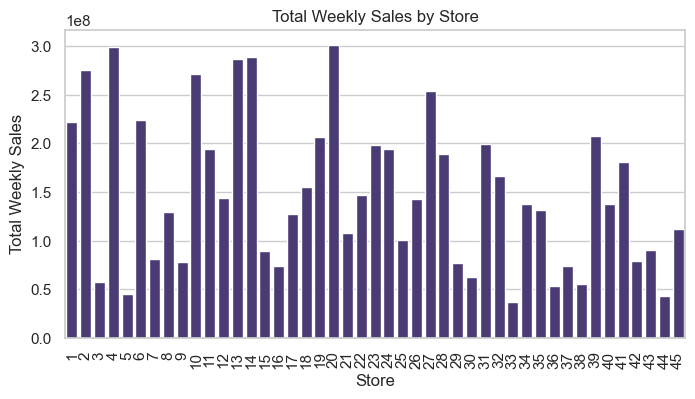

In [54]:
# Group by Store to analyze performance
store_performance = df.groupby('Store')[['Weekly_Sales']].sum().sort_values(by='Weekly_Sales', ascending=False)
print(store_performance.head())

# Top performing stores
top_stores = store_performance.head(3)
print("Top 3 Performing Stores:\n", top_stores)

# Plot sales by store
plt.figure(figsize=(8, 4))
sns.barplot(data=store_performance, x=store_performance.index, y='Weekly_Sales')
plt.title('Total Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=90)
plt.savefig(f'{plot_no}_plot.png')
plot_no += 1

# Forescating

In [56]:
# Data Processing and Machine Learning
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [57]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
#SEQUENCE PREPARATION
def create_sequences(data, target_col, feature_cols, sequence_length):
    """
    Create sequences for LSTM
    """
    X, y = [], []
    
    for store in data['Store'].unique():
        store_data = data[data['Store'] == store].sort_values('Date')
        
        features = store_data[feature_cols].values
        target = store_data[target_col].values
        
        for i in range(len(features) - sequence_length):
            X.append(features[i:i+sequence_length])
            y.append(target[i+sequence_length])
    
    return np.array(X), np.array(y)

In [59]:
#MODEL ARCHITECTURE
def create_lstm_model(input_shape):
    """
    Create LSTM Model Architecture
    """
    model = Sequential([
        LSTM(128, activation='relu', return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        LSTM(64, activation='relu', return_sequences=True),
        Dropout(0.3),
        LSTM(32, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='mean_squared_error', 
                  metrics=['mae'])
    
    return model

In [64]:
# Prepare Features
feature_cols = [
        'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
        'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
        'IsHoliday', 'Size', 'Year', 'Month'
]
target_col = 'Weekly_Sales'

In [66]:
# Encode categorical variables
le = LabelEncoder()
df['Type_Encoded'] = le.fit_transform(df['Type'])
feature_cols.append('Type_Encoded')

In [68]:
# Scaling
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

In [70]:
# Normalize features and target
df[feature_cols] = scaler_features.fit_transform(df[feature_cols])
df[target_col] = scaler_target.fit_transform(df[[target_col]])

In [72]:
# Create sequences
sequence_length = 30
X, y = create_sequences(df, target_col, feature_cols, sequence_length)

In [73]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Create and train model
model = create_lstm_model((X_train.shape[1], X_train.shape[2]))

In [78]:
# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2, 
    patience=5, 
    min_lr=0.0001
)

In [ ]:
# Training
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,  
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
5253/5253 [==============================] - 233s 44ms/step - loss: 9.8746e-04 - mae: 0.0208 - val_loss: 0.0010 - val_mae: 0.0215 - lr: 0.0010
Epoch 2/100
5253/5253 [==============================] - 231s 44ms/step - loss: 9.7325e-04 - mae: 0.0207 - val_loss: 0.0010 - val_mae: 0.0215 - lr: 0.0010
Epoch 3/100
5253/5253 [==============================] - 231s 44ms/step - loss: 9.6993e-04 - mae: 0.0206 - val_loss: 9.9220e-04 - val_mae: 0.0206 - lr: 0.0010
Epoch 4/100
5253/5253 [==============================] - 230s 44ms/step - loss: 9.6677e-04 - mae: 0.0206 - val_loss: 9.9959e-04 - val_mae: 0.0216 - lr: 0.0010
Epoch 5/100
5253/5253 [==============================] - 231s 44ms/step - loss: 9.6582e-04 - mae: 0.0206 - val_loss: 0.0010 - val_mae: 0.0200 - lr: 0.0010
Epoch 6/100
5253/5253 [==============================] - 237s 45ms/step - loss: 9.6420e-04 - mae: 0.0205 - val_loss: 9.9319e-04 - val_mae: 0.0208 - lr: 0.0010
Epoch 7/100
5253/5253 [==============================] - 2

In [ ]:
# Save the model in TensorFlow SavedModel format
model.save('lstm_model')

In [ ]:
from tensorflow.keras.models import load_model

# Load the TensorFlow SavedModel format
model = load_model('lstm_sales_model')

In [ ]:
# Predictions
predictions = model.predict(X_val)

In [ ]:
# Inverse transform to get original scale
predictions_original = scaler_target.inverse_transform(predictions)
actuals_original = scaler_target.inverse_transform(y_val.reshape(-1, 1))

In [ ]:
# Evaluation Metrics
mae = mean_absolute_error(actuals_original, predictions_original)
mse = mean_squared_error(actuals_original, predictions_original)
rmse = np.sqrt(mse)
r2 = r2_score(actuals_original, predictions_original)

print("\nModel Performance Metrics:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

In [ ]:
# Visualization
plt.figure(figsize=(8,4))
plt.plot(actuals_original[:100], label='Actual Sales', color='blue')
plt.plot(predictions_original[:100], label='Predicted Sales', color='red')
plt.title('Actual vs Predicted Sales (First 100 Samples)')
plt.xlabel('Time Steps')
plt.ylabel('Weekly Sales')
plt.legend()
plt.savefig(f'{plot_no}_plot.png')
plot_no += 1

In [ ]:
# Training History Plot
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.savefig(f'{plot_no}_plot.png')
plot_no += 1

In [ ]:
#Strategic Insights for Inventory and Marketing

# Analyze impact of fuel price and CPI on sales
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Fuel_Price', y='Weekly_Sales', hue='IsHoliday')
plt.title('Fuel Price vs Weekly Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.legend(title='Holiday', loc='best')
plt.savefig(f'{plot_no}_plot.png')
plot_no += 1

# Analyze impact of Temperature on sales
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', hue='IsHoliday')
plt.title('Temperature vs Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.legend(title='Holiday', loc='best')
plt.savefig(f'{plot_no}_plot.png')
plot_no += 1

# Strategic insights for inventory and marketing
holiday_sales_total = df[df['IsHoliday'] == True]['Weekly_Sales'].sum()
non_holiday_sales_total = df[df['IsHoliday'] == False]['Weekly_Sales'].sum()

print(f"Total Sales During Holidays: {holiday_sales_total}")
print(f"Total Sales During Non-Holidays: {non_holiday_sales_total}")

# Difference in sales between holidays and non-holidays
sales_difference = holiday_sales_total - non_holiday_sales_total
print(f"Sales Difference (Holidays vs Non-Holidays): {sales_difference}")

# Insights into potential marketing strategy
if sales_difference > 0:
    print("Holiday weeks contribute more to sales. Marketing should focus on driving more traffic during holiday periods.")
else:
    print("Non-holiday periods are significant. Focus on promotions and incentives during these weeks to boost sales.")